1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many local minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import basinhopping
from mpl_toolkits import mplot3d

%matplotlib inline
plt.style.use('default')

Solution: f([ 0.08984202 -0.7126564 ]) = -1.03163
Solution: f([-0.08984201  0.7126564 ]) = -1.03163
Solution: f([-0.08984202  0.7126564 ]) = -1.03163


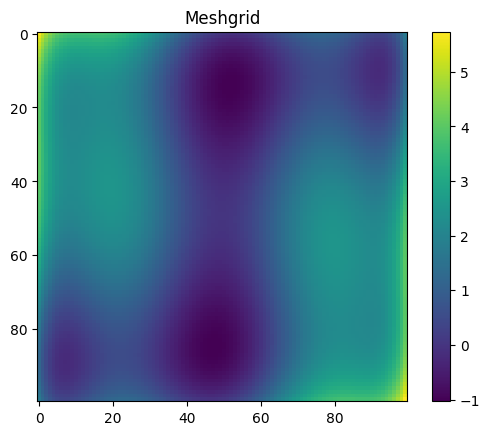

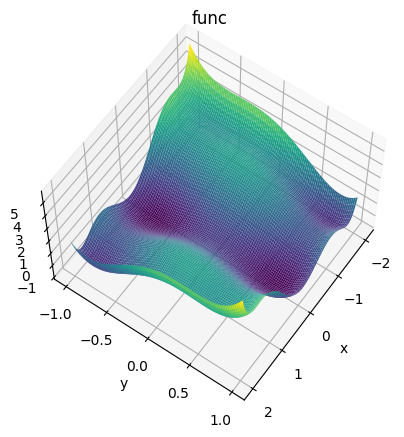

In [4]:
#the function
def func(params):
    x,y = params
    return (4-2.1*x**2+(x**4/3))*x**2+x*y+(4*y**2-4)*y**2

x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

#use numpy.meshgrid() to find visually the regions
#we can see two regions where the data is darker (-1)
#Around x = 0 and y = -0.65 and y = 0.62
X, Y = np.meshgrid(x,y)
Z = func([X, Y])
plt.figure()
plt.imshow(Z, origin='upper')
plt.title('Meshgrid')
plt.colorbar()


#plot the function in 3D
plt.figure()
ax = plt.axes(projection='3d')
#we change the point of view to better sew the minimums
ax.view_init(60, 35)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       cmap='viridis', edgecolor='none')
ax.set_title('func');

#find the two global minimum : [0, -0.6] and [0, 0.6]
#but they have the same values so it is like one global minimum
#however, the two global minimum => local minimum

#we have two minimum values at -1.03163 
#therefor, we can say that we have two global minimum with values at -1.03163
#to find the two global minimum, we need to search with two different first values 
#these two "global" minimum are the local minimum of the function
x0 = [0, -0.6]
result = basinhopping(func, x0, stepsize=0.1)
# evaluate solution
solution = result['x']
evaluation = func(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

x0 = [0, 0.6]
result = basinhopping(func, x0, stepsize=0.1)
# evaluate solution
solution = result['x']
evaluation = func(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

#Initial guess at (0,0)
#the outcome is either the first local minimum or the second local minimum
#because the guess is close to both local minimums, the function basinhopping don't know which local minimum to choose
x0 = [0, 0]
result = basinhopping(func, x0, stepsize=0.1)
# evaluate solution
solution = result['x']
evaluation = func(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with odeint over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - *Optional*: determine if there is a set of parameters for which the motion is chaotic.

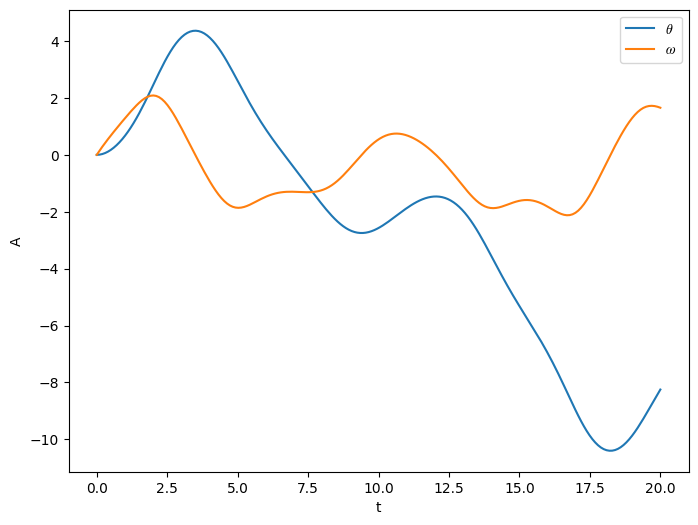

In [3]:
from scipy.integrate import odeint
import math

def derivative(X, time, Q, d, bigO):
    return(X[1], (-1/Q)*X[1]+math.sin(X[0])+d*math.cos(bigO*time))

Xinit = [0,0]
Q = 2.0
d = 1.5
bigO = 0.65

#A period of 200 time steps
t = np.linspace(0,20,200)
X = odeint(derivative, Xinit, t, args=(Q, d, bigO))

# plot y and y'
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$𝜃$")
plt.plot(t, X[:, 1], label="$𝜔$")
plt.xlabel('t')
plt.ylabel('A')
plt.legend(loc='best')


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

    # year     hare     lynx  carrot
0     1900  30000.0   4000.0   48300
1     1901  47200.0   6100.0   48200
2     1902  70200.0   9800.0   41500
3     1903  77400.0  35200.0   38200
4     1904  36300.0  59400.0   40600
5     1905  20600.0  41700.0   39800
6     1906  18100.0  19000.0   38600
7     1907  21400.0  13000.0   42300
8     1908  22000.0   8300.0   44500
9     1909  25400.0   9100.0   42100
10    1910  27100.0   7400.0   46000
11    1911  40300.0   8000.0   46800
12    1912  57000.0  12300.0   43800
13    1913  76600.0  19500.0   40900
14    1914  52300.0  45700.0   39400
15    1915  19500.0  51100.0   39000
16    1916  11200.0  29700.0   36700
17    1917   7600.0  15800.0   41800
18    1918  14600.0   9700.0   43300
19    1919  16200.0  10100.0   41300
20    1920  24700.0   8600.0   47300


Text(0, 0.5, 'Amplitude')

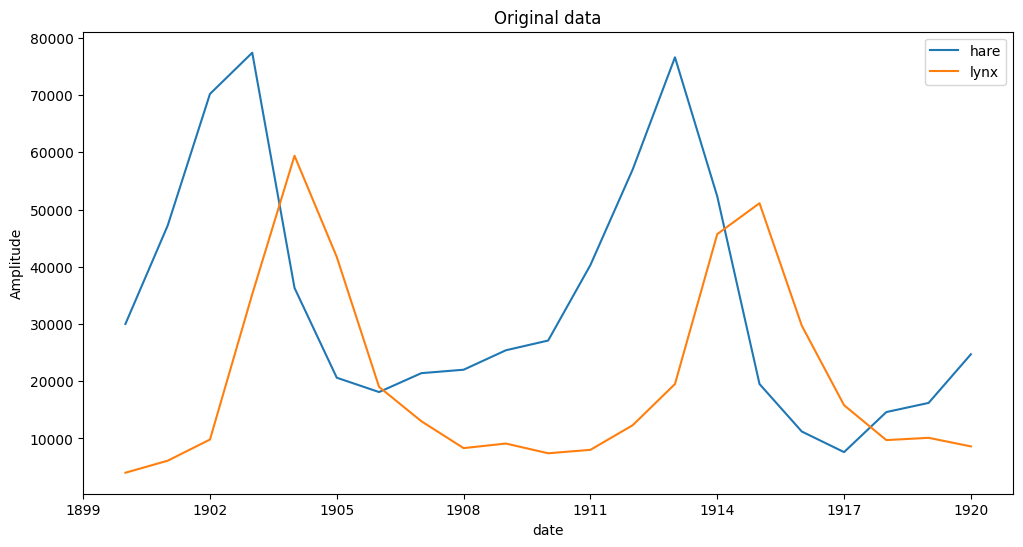

In [19]:
from scipy import fftpack
import pandas as pd
from matplotlib.ticker import MaxNLocator

df = pd.read_csv('data/populations.txt', delimiter = "\t")
print(df)
fig = plt.figure(figsize=(12, 6))

#VALUES
date = df['# year'].values
sig_hare = df['hare'].values
sig_lynx = df['lynx'].values

time_step = 1

#Plot original signal
plt.plot(date, sig_hare, label='hare')
plt.plot(date, sig_lynx, label='lynx')
plt.legend(loc='best')
plt.title('Original data')
ax = fig.axes[0]
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('date')
ax.set_ylabel('Amplitude')

In [8]:
# The FFT of the signal and the power
sig_fft_hare = fftpack.fft(sig_hare)
sig_fft_lynx = fftpack.fft(sig_lynx)
# these are the "weights" of the Fourier components for each discrete frequency interva
power_hare = np.abs(sig_fft_hare) 
power_lynx = np.abs(sig_fft_lynx) 

# The return the corresponding frequencies
sample_freq_hare = fftpack.fftfreq(sig_hare.size, d=1)
sample_freq_lynx = fftpack.fftfreq(sig_lynx.size, d=1)

# Find the peak frequency: focus only on only the positive frequencies
pos_mask_hare = np.where(sample_freq_hare > 0)
freqs_hare = sample_freq_hare[pos_mask_hare]
powes_hare = power_hare[pos_mask_hare]

pos_mask_lynx = np.where(sample_freq_lynx > 0)
freqs_lynx = sample_freq_lynx[pos_mask_lynx]
powes_lynx = power_lynx[pos_mask_lynx]

# find the max of freqs array
peak_freq_hare = freqs_hare[powes_hare.argmax()]
peak_freq_lynx = freqs_lynx[powes_lynx.argmax()]


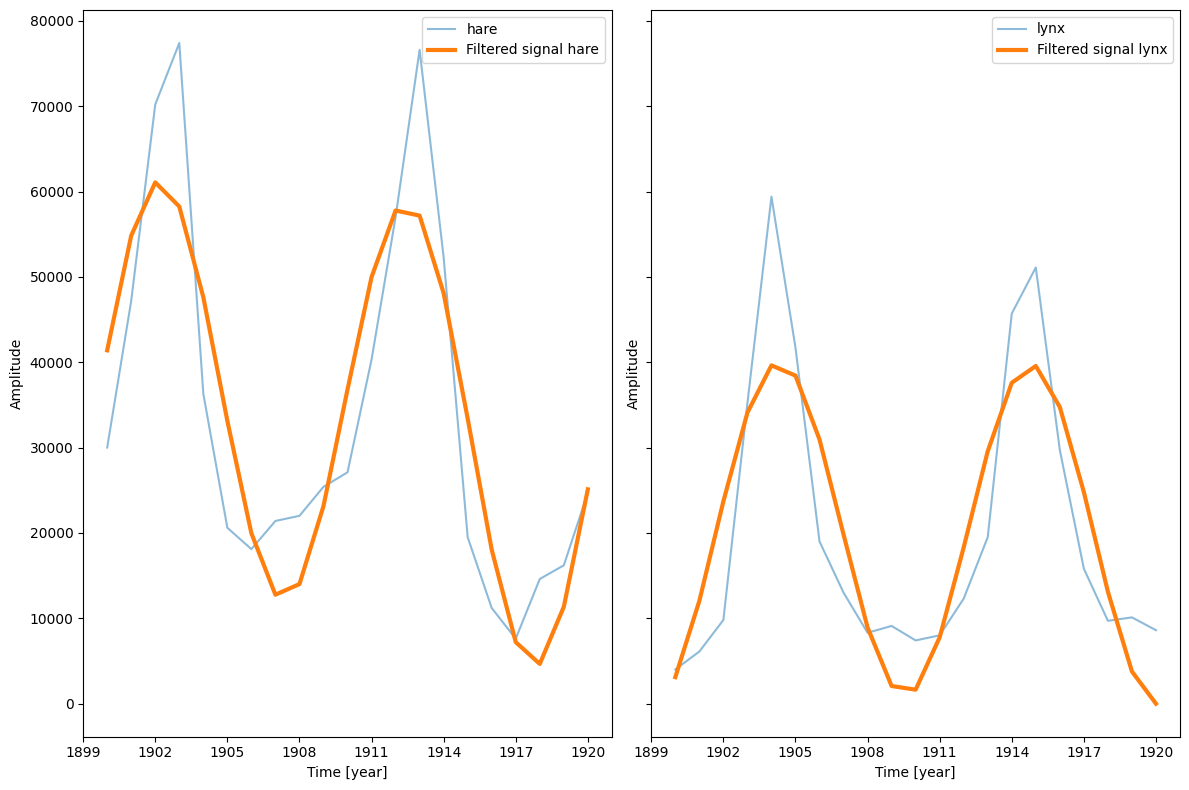

In [9]:
#now we want to create a filter that removes the random noise and returns the periodic signal
high_freq_fft_hare = sig_fft_hare.copy() 
high_freq_fft_lynx = sig_fft_lynx.copy()


# filter (set to zero) all high frequency components that are larger than peak_freq
high_freq_fft_hare[np.abs(sample_freq_hare) - peak_freq_hare > 0] = 0
high_freq_fft_lynx[np.abs(sample_freq_lynx) - peak_freq_lynx > 0] = 0


# calculate the Inverse Fast Fourier Transform
filtered_sig_h = np.real(fftpack.ifft(high_freq_fft_hare))
filtered_sig_l = np.real(fftpack.ifft(high_freq_fft_lynx))

fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(12, 8))
ax1.plot(date, sig_hare, alpha=0.5, label='hare')
ax1.plot(date, filtered_sig_h, linewidth=3, label='Filtered signal hare')
ax1.set_xlabel('Time [year]')
ax1.set_ylabel('Amplitude')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.legend(loc='best')
ax2.plot(date, sig_lynx, alpha=0.5, label='lynx')
ax2.plot(date, filtered_sig_l, linewidth=3, label='Filtered signal lynx')
ax2.set_xlabel('Time [year]')
ax2.set_ylabel('Amplitude')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.legend(loc='best')
fig.tight_layout()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

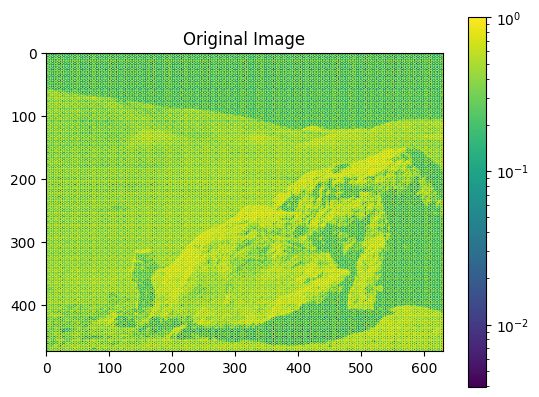

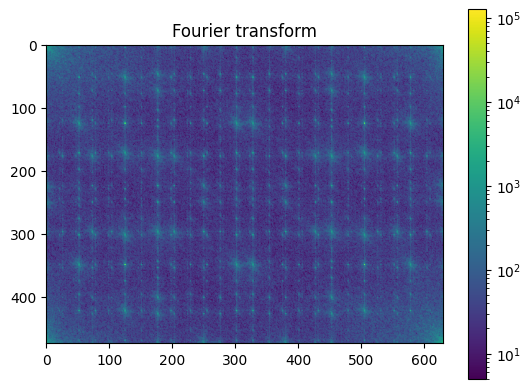

<Figure size 800x600 with 0 Axes>

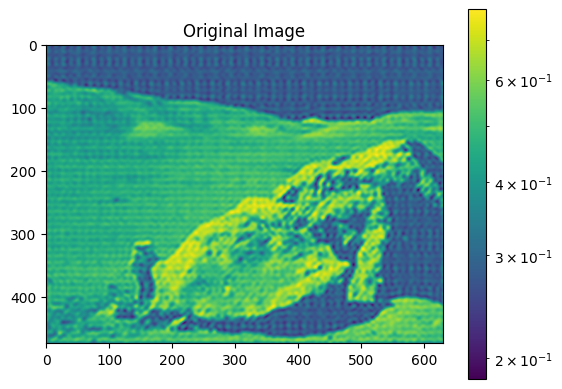

In [41]:
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2

#importing the image as a 2D numpy array
image = plt.imread("images/moonlanding.png")
#examine the image
fig, ax = plt.subplots()
#vmin and vmax are initialized from the minimum and maximum value
shw = ax.imshow(image, norm=LogNorm())
bar = plt.colorbar(shw)
plt.title('Original Image')
plt.show()

#compute the 2-D discrete Fourier
sig_ftt_2d = fft2(image)
power = np.abs(sig_ftt_2d)

plt.figure()
plt.imshow(power, norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Power Spectrum')

#We can see that in each corner of Power Spectrum figure, we have some light which corresponds to the signal
#the rest of the Power Spectrum is populated by periodic lights which corresponds to the periodic noise. 

#Set the noise regions to zero
image_fft2 = sig_ftt_2d.copy() # create an explicit copy of the FFT
r, c = image_fft2.shape # rows, columns

# For the rows:
image_fft2[int(r*0.1):int(0.9*r),:] = 0

# For the columns:
image_fft2[:,int(c*0.1):int(0.9*c)] = 0

#Apply the inverse Fourier transform to plot the resulting image.
filtered_sig = fftpack.ifft2(image_fft2)

# only take the real part
real_filtered_signal = np.real(filtered_sig)

# plot the result of the IFFT
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
#vmin and vmax are initialized from the minimum and maximum value
shw = ax.imshow(real_filtered_signal, norm=LogNorm())
bar = plt.colorbar(shw)
plt.title('Filtered Image')
plt.show()